# Orbits of Comets

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})

In [2]:
G=6.67408*10**(-11)
M=1.989*10**30

def AUtom(q):
    return q*1.496*10**11

def sma(q,e):
    return (AUtom(q)/(1-e))

def v_p(q,e):
    return math.sqrt(G*M*(1+e)/AUtom(q))

def accx(x,y):
    return -(G*M)*x/(math.pow((x**2+y**2),3/2))

def accy(x,y):
    return -(G*M)*y/(math.pow((x**2+y**2),3/2))

def totE(q,e):
    return -G*M/(2*sma(q,e)) 

def Tperiod(q,e,y=1):
    if y==1:
        return (2*math.pi*math.sqrt((sma(q,e)**3)/(G*M)))/(31556952)
    else:
        return 2*math.pi*math.sqrt((sma(q,e)**3)/(G*M))

## Euler Method

In [3]:
def euler(q,e,n,dts):
    x0,y0,vx0,vy0=AUtom(q),0,0,v_p(q,e)
    dt=1*24*60*60*3*dts
    tmax=1*24*60*60*365*n
    x=[]
    y=[]
    vx=[]
    vy=[]
    t=dt
    while t<tmax:
        x.append(x0)
        y.append(y0)
        vx.append(vx0)
        vy.append(vy0)
        x0+=dt*vx0
        y0+=dt*vy0
        vx0+=dt*accx(x[-1],y[-1])
        vy0+=dt*accy(x[-1],y[-1])
        t+=dt
    r=[math.sqrt(i**2+j**2) for i,j in zip(x,y)]
    v=[math.sqrt(i**2+j**2) for i,j in zip(vx,vy)]
    th_totE=[totE(q,e)]*len(x)
    totalE=[((i**2)/2)-(G*M/j) for i,j in zip(v,r)]
    kinE=[((i**2)/2)for i in v]
    potE=[-(G*M/j) for j in r]
    return {'x':x,'y':y,'vx':vx,'vy':vy,'r':r,'v':v,'totalE':totalE,'kinE':kinE,'potE':potE,'th_totE':th_totE}

def euler_plot(q,e,n,dts,name):
    t=euler(q,e,n,dts)
    fig, axs = plt.subplots(2,constrained_layout=True)
    fig.suptitle('Orbit of Comet '+name+' obtained by Euler Method')
    fig.set_size_inches(16, 12, forward=True)
    axs[0].plot(t['x'],t['y'])
    axs[0].set_title('Trajectory of comet for $\\tau$ = '+str(dts)+' days and $t_{total}$ = '+str(n)+' years')
    axs[1].plot(t['r'],t['th_totE'],label='Theoretical total mechanical energy')
    axs[1].plot(t['r'],t['totalE'],label='Total mechanical energy')
    axs[1].plot(t['r'],t['kinE'],label='Kinetic Energy')
    axs[1].plot(t['r'],t['potE'],label='Potential Energy')
    axs[1].set_xlabel('r (in m)')
    axs[1].set_ylabel('Energy (in J)')
    axs[1].set_title('Energy diagram')
    axs[1].legend(loc='best')

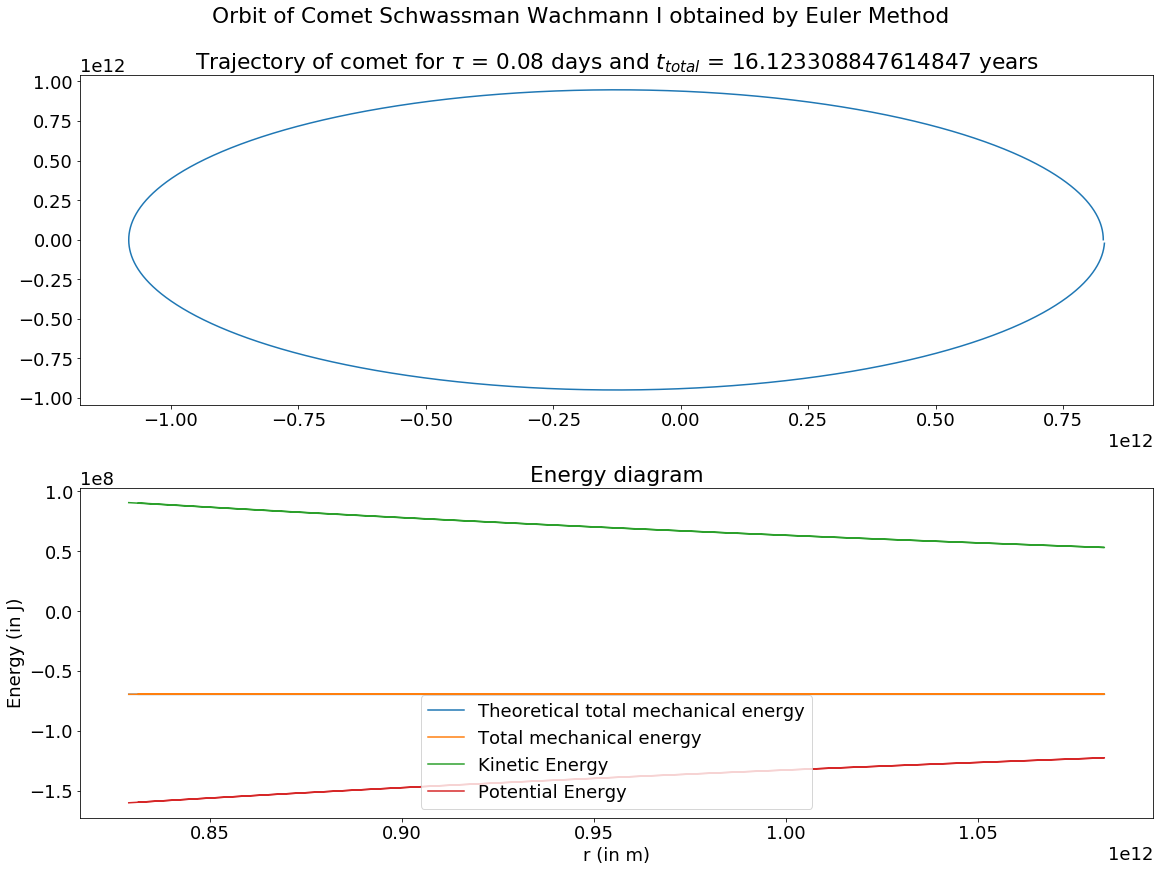

In [4]:
euler_plot(5.540,0.132,Tperiod(5.540,0.132),0.08,'Schwassman Wachmann I')

## Euler-Cromer Method

In [5]:
def euler_cromer(q,e,n,dts):
    x0,y0,vx0,vy0=AUtom(q),0,0,v_p(q,e)
    dt=1*24*60*60*3*dts
    tmax=1*24*60*60*365*n
    x=[]
    y=[]
    vx=[]
    vy=[]
    t=dt
    while t<tmax:
        x.append(x0)
        y.append(y0)
        vx.append(vx0)
        vy.append(vy0)
        x0+=dt*vx0
        y0+=dt*vy0
        vx0+=dt*accx(x0,y0)
        vy0+=dt*accy(x0,y0)
        t+=dt
    r=[math.sqrt(i**2+j**2) for i,j in zip(x,y)]
    v=[math.sqrt(i**2+j**2) for i,j in zip(vx,vy)]
    th_totE=[totE(q,e)]*len(x)
    totalE=[((i**2)/2)-(G*M/j) for i,j in zip(v,r)]
    kinE=[((i**2)/2)for i in v]
    potE=[-(G*M/j) for j in r]
    return {'x':x,'y':y,'vx':vx,'vy':vy,'r':r,'v':v,'totalE':totalE,'kinE':kinE,'potE':potE,'th_totE':th_totE}

def euler_cromer_plot(q,e,n,dts,name):
    t=euler_cromer(q,e,n,dts)
    fig, axs = plt.subplots(2,constrained_layout=True)
    fig.suptitle('Orbit of Comet '+name+' obtained by Euler-Cromer Method')
    fig.set_size_inches(16, 12, forward=True)
    axs[0].plot(t['x'],t['y'])
    axs[0].set_title('Trajectory of comet for $\\tau$ = '+str(dts)+' days and $t_{total}$ = '+str(n)+' years')
    axs[1].plot(t['r'],t['th_totE'],label='Theoretical total mechanical energy')
    axs[1].plot(t['r'],t['totalE'],label='Total mechanical energy')
    axs[1].plot(t['r'],t['kinE'],label='Kinetic Energy')
    axs[1].plot(t['r'],t['potE'],label='Potential Energy')
    axs[1].set_xlabel('r (in m)')
    axs[1].set_ylabel('Energy (in J)')
    axs[1].set_title('Energy diagram')
    axs[1].legend(loc='best')

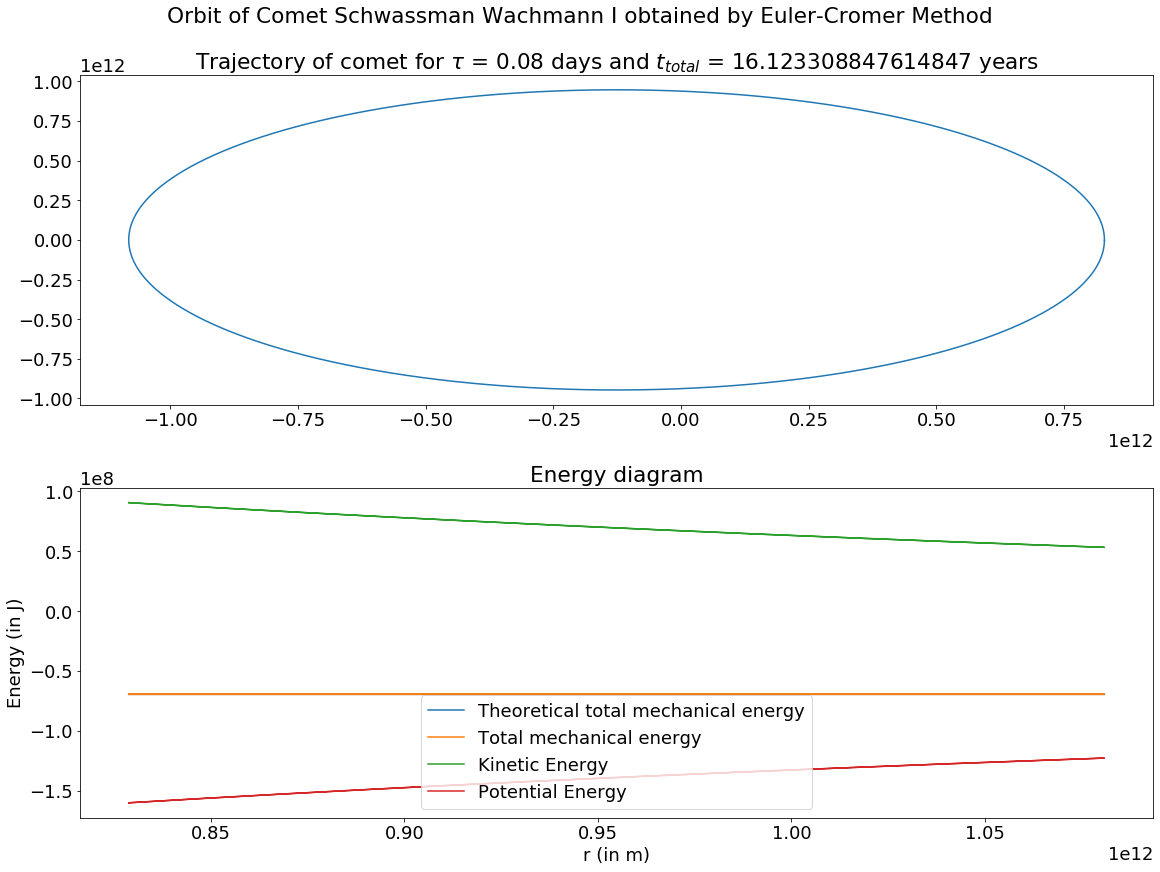

In [6]:
euler_cromer_plot(5.540,0.132,Tperiod(5.540,0.132),0.08,'Schwassman Wachmann I')

## Mid-Point Method

In [7]:
def mid_point(q,e,n,dts):
    x0,y0,vx0,vy0=AUtom(q),0,0,v_p(q,e)
    dt=1*24*60*60*3*dts
    tmax=1*24*60*60*365*n
    x=[]
    y=[]
    vx=[]
    vy=[]
    t=dt
    while t<tmax:
        x.append(x0)
        y.append(y0)
        vx.append(vx0)
        vy.append(vy0)
        x0+=dt*vx0+(dt**2)*accx(x[-1],y[-1])/2
        y0+=dt*vy0+(dt**2)*accy(x[-1],y[-1])/2
        vx0+=dt*accx(x[-1],y[-1])
        vy0+=dt*accy(x[-1],y[-1])
        t+=dt
    r=[math.sqrt(i**2+j**2) for i,j in zip(x,y)]
    v=[math.sqrt(i**2+j**2) for i,j in zip(vx,vy)]
    th_totE=[totE(q,e)]*len(x)
    totalE=[((i**2)/2)-(G*M/j) for i,j in zip(v,r)]
    kinE=[((i**2)/2)for i in v]
    potE=[-(G*M/j) for j in r]
    return {'x':x,'y':y,'vx':vx,'vy':vy,'r':r,'v':v,'totalE':totalE,'kinE':kinE,'potE':potE,'th_totE':th_totE}

def mid_point_plot(q,e,n,dts,name):
    t=mid_point(q,e,n,dts)
    fig, axs = plt.subplots(2,constrained_layout=True)
    fig.suptitle('Orbit of Comet '+name+' obtained by Mid-Point Method')
    fig.set_size_inches(16, 12, forward=True)
    axs[0].plot(t['x'],t['y'])
    axs[0].set_title('Trajectory of comet for $\\tau$ = '+str(dts)+' days and $t_{total}$ = '+str(n)+' years')
    axs[1].plot(t['r'],t['th_totE'],label='Theoretical total mechanical energy')
    axs[1].plot(t['r'],t['totalE'],label='Total mechanical energy')
    axs[1].plot(t['r'],t['kinE'],label='Kinetic Energy')
    axs[1].plot(t['r'],t['potE'],label='Potential Energy')
    axs[1].set_xlabel('r (in m)')
    axs[1].set_ylabel('Energy (in J)')
    axs[1].set_title('Energy diagram')
    axs[1].legend(loc='best')

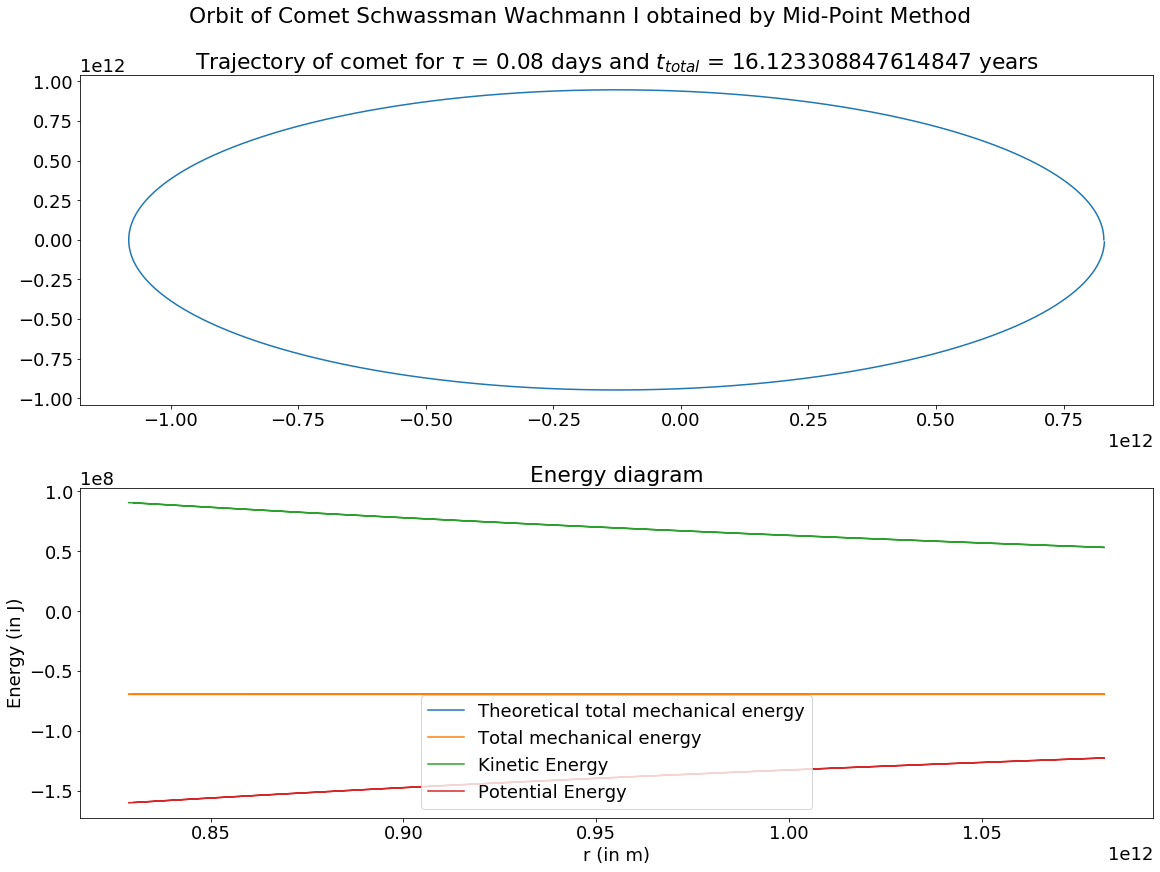

In [8]:
mid_point_plot(5.540,0.132,Tperiod(5.540,0.132),0.08,'Schwassman Wachmann I')

## Leap-Frog Method

In [9]:
def leap_frog(q,e,n,dts):
    x0,y0,vx1,vy1=AUtom(q),0,0,v_p(q,e)
    dt=1*24*60*60*3*dts
    tmax=1*24*60*60*365*n
    x=[]
    y=[]
    vx=[]
    vy=[]
    t=dt
    while t<tmax:
        x.append(x0)
        y.append(y0)
        vx.append(vx1)
        vy.append(vy1)
        vx1+=2*dt*accx(x[-1],y[-1])
        vy1+=2*dt*accy(x[-1],y[-1])
        x0+=2*dt*vx1
        y0+=2*dt*vy1
        t+=dt
    r=[math.sqrt(i**2+j**2) for i,j in zip(x,y)]
    v=[math.sqrt(i**2+j**2) for i,j in zip(vx,vy)]
    th_totE=[totE(q,e)]*len(x)
    totalE=[((i**2)/2)-(G*M/j) for i,j in zip(v,r)]
    kinE=[((i**2)/2)for i in v]
    potE=[-(G*M/j) for j in r]
    return {'x':x,'y':y,'vx':vx,'vy':vy,'r':r,'v':v,'totalE':totalE,'kinE':kinE,'potE':potE,'th_totE':th_totE}

def leap_frog_plot(q,e,n,dts,name):
    t=leap_frog(q,e,n,dts)
    fig, axs = plt.subplots(2,constrained_layout=True)
    fig.suptitle('Orbit of Comet '+name+' obtained by Leap-Frog Method')
    fig.set_size_inches(16, 12, forward=True)
    axs[0].plot(t['x'],t['y'])
    axs[0].set_title('Trajectory of comet for $\\tau$ = '+str(dts)+' days and $t_{total}$ = '+str(n)+' years')
    axs[1].plot(t['r'],t['th_totE'],label='Theoretical total mechanical energy')
    axs[1].plot(t['r'],t['totalE'],label='Total mechanical energy')
    axs[1].plot(t['r'],t['kinE'],label='Kinetic Energy')
    axs[1].plot(t['r'],t['potE'],label='Potential Energy')
    axs[1].set_xlabel('r (in m)')
    axs[1].set_ylabel('Energy (in J)')
    axs[1].set_title('Energy diagram')
    axs[1].legend(loc='best')

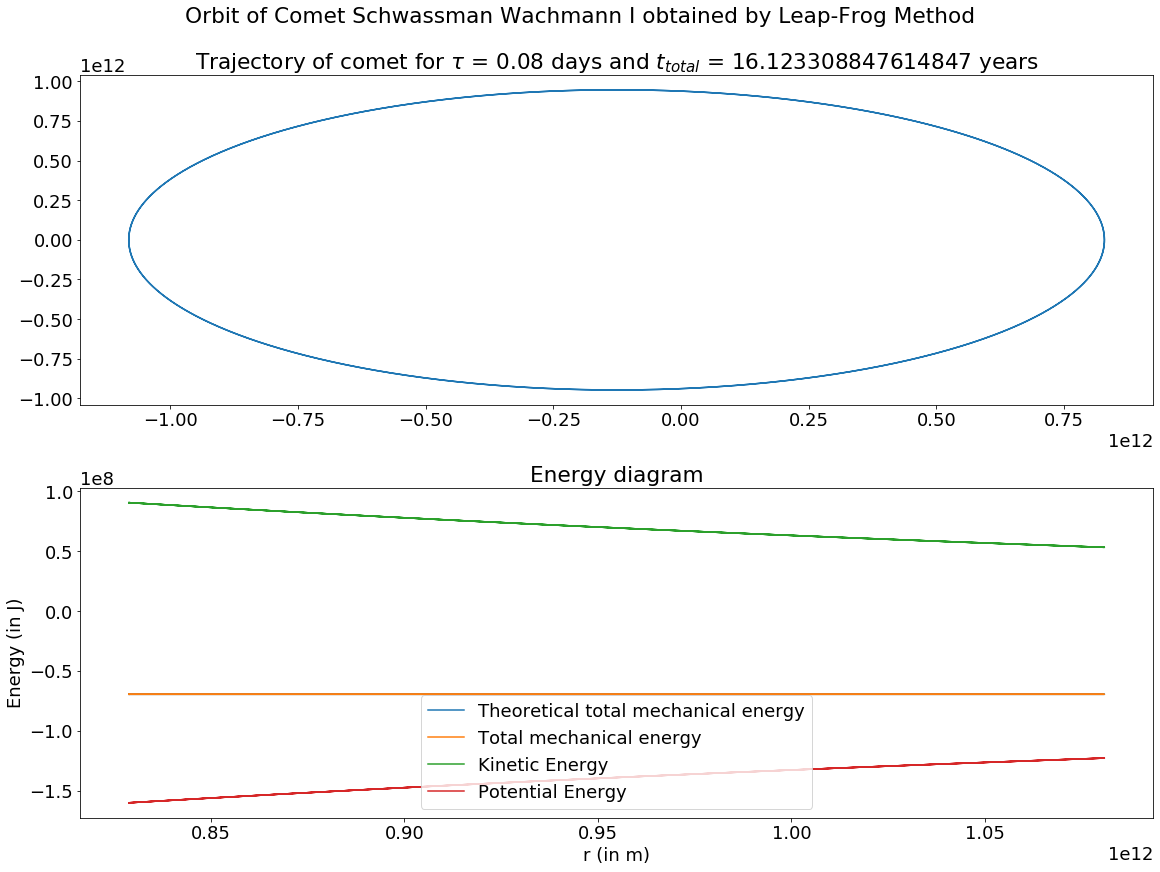

In [10]:
leap_frog_plot(5.540,0.132,Tperiod(5.540,0.132),0.08,'Schwassman Wachmann I')

## Verlet Method

In [11]:
def verlet(q,e,n,dts):
    x0,y0,vx0,vy0=AUtom(q),0,0,v_p(q,e)
    dt=1*24*60*60*3*dts
    tmax=1*24*60*60*365*n
    x=[]
    y=[]
    vx=[]
    vy=[]
    t=dt
    while t<tmax:
        x.append(x0)
        y.append(y0)
        vx.append(vx0)
        vy.append(vy0)
        x0+=dt*vx0+(dt**2)*accx(x[-1],y[-1])/2
        y0+=dt*vy0+(dt**2)*accy(x[-1],y[-1])/2
        vx0+=dt*(accx(x[-1],y[-1])+accx(x0,y0))/2
        vy0+=dt*(accy(x[-1],y[-1])+accy(x0,y0))/2
        t+=dt
    r=[math.sqrt(i**2+j**2) for i,j in zip(x,y)]
    v=[math.sqrt(i**2+j**2) for i,j in zip(vx,vy)]
    th_totE=[totE(q,e)]*len(x)
    totalE=[((i**2)/2)-(G*M/j) for i,j in zip(v,r)]
    kinE=[((i**2)/2)for i in v]
    potE=[-(G*M/j) for j in r]
    return {'x':x,'y':y,'vx':vx,'vy':vy,'r':r,'v':v,'totalE':totalE,'kinE':kinE,'potE':potE,'th_totE':th_totE}

def verlet_plot(q,e,n,dts,name):
    t=verlet(q,e,n,dts)
    fig, axs = plt.subplots(2,constrained_layout=True)
    fig.suptitle('Orbit of Comet '+name+' obtained by Verlet Method')
    fig.set_size_inches(16, 12, forward=True)
    axs[0].plot(t['x'],t['y'])
    axs[0].set_title('Trajectory of comet for $\\tau$ = '+str(dts)+' days and $t_{total}$ = '+str(n)+' years')
    axs[1].plot(t['r'],t['th_totE'],label='Theoretical total mechanical energy')
    axs[1].plot(t['r'],t['totalE'],label='Total mechanical energy')
    axs[1].plot(t['r'],t['kinE'],label='Kinetic Energy')
    axs[1].plot(t['r'],t['potE'],label='Potential Energy')
    axs[1].set_xlabel('r (in m)')
    axs[1].set_ylabel('Energy (in J)')
    axs[1].set_title('Energy diagram')
    axs[1].legend(loc='best')

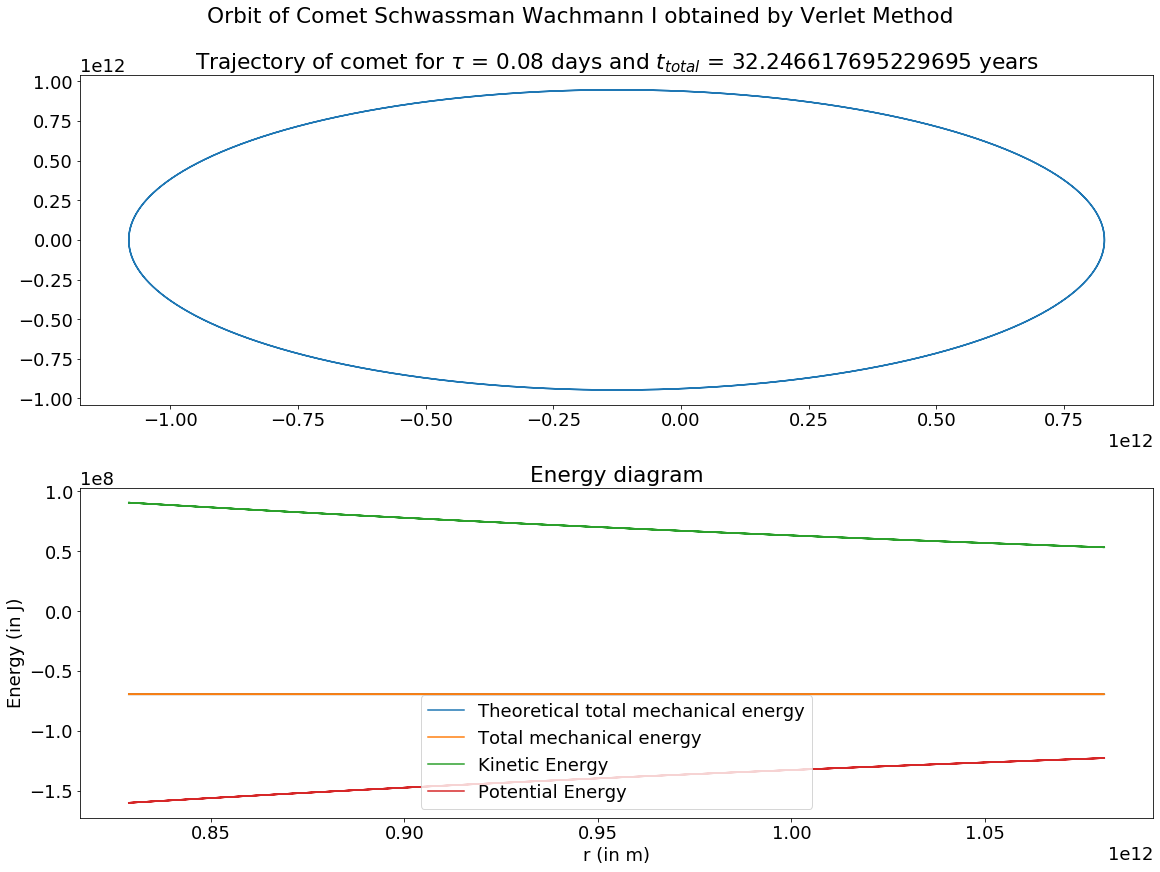

In [12]:
verlet_plot(5.540,0.132,2*Tperiod(5.540,0.132),0.08,'Schwassman Wachmann I')

## Second-Order Runge-Kutta Method

In [13]:
def rk02(q,e,n,dts):
    x0,y0,vx0,vy0=AUtom(q),0,0,v_p(q,e)
    dt=1*24*60*60*3*dts
    tmax=1*24*60*60*365*n
    x=[]
    y=[]
    vx=[]
    vy=[]
    x2=x0
    y2=y0
    vx2=vx0
    vy2=vy0
    t=dt
    while t<tmax:
        x.append(x0)
        y.append(y0)
        vx.append(vx0)
        vy.append(vy0)
        x2+=(dt/2)*vx0
        y2+=(dt/2)*vy0
        vx2+=(dt/2)*accx(x0,y0)
        vy2+=(dt/2)*accy(x0,y0)
        x0+=dt*vx0+(dt**2)*accx(x0,y0)/2
        y0+=dt*vy0+(dt**2)*accy(x0,y0)/2
        vx0+=dt*(accx(x2,y2))
        vy0+=dt*(accy(x2,y2))
        t+=dt
    r=[math.sqrt(i**2+j**2) for i,j in zip(x,y)]
    v=[math.sqrt(i**2+j**2) for i,j in zip(vx,vy)]
    th_totE=[totE(q,e)]*len(x)
    totalE=[((i**2)/2)-(G*M/j) for i,j in zip(v,r)]
    kinE=[((i**2)/2)for i in v]
    potE=[-(G*M/j) for j in r]
    return {'x':x,'y':y,'vx':vx,'vy':vy,'r':r,'v':v,'totalE':totalE,'kinE':kinE,'potE':potE,'th_totE':th_totE}

def rk02_plot(q,e,n,dts,name):
    t=rk02(q,e,n,dts)
    fig, axs = plt.subplots(2,constrained_layout=True)
    fig.suptitle('Orbit of Comet '+name+' obtained by RK02 Method')
    fig.set_size_inches(16, 12, forward=True)
    axs[0].plot(t['x'],t['y'])
    axs[0].set_title('Trajectory of comet for $\\tau$ = '+str(dts)+' days and $t_{total}$ = '+str(n)+' years')
    axs[1].plot(t['r'],t['th_totE'],label='Theoretical total mechanical energy')
    axs[1].plot(t['r'],t['totalE'],label='Total mechanical energy')
    axs[1].plot(t['r'],t['kinE'],label='Kinetic Energy')
    axs[1].plot(t['r'],t['potE'],label='Potential Energy')
    axs[1].set_xlabel('r (in m)')
    axs[1].set_ylabel('Energy (in J)')
    axs[1].set_title('Energy diagram')
    axs[1].legend(loc='best')

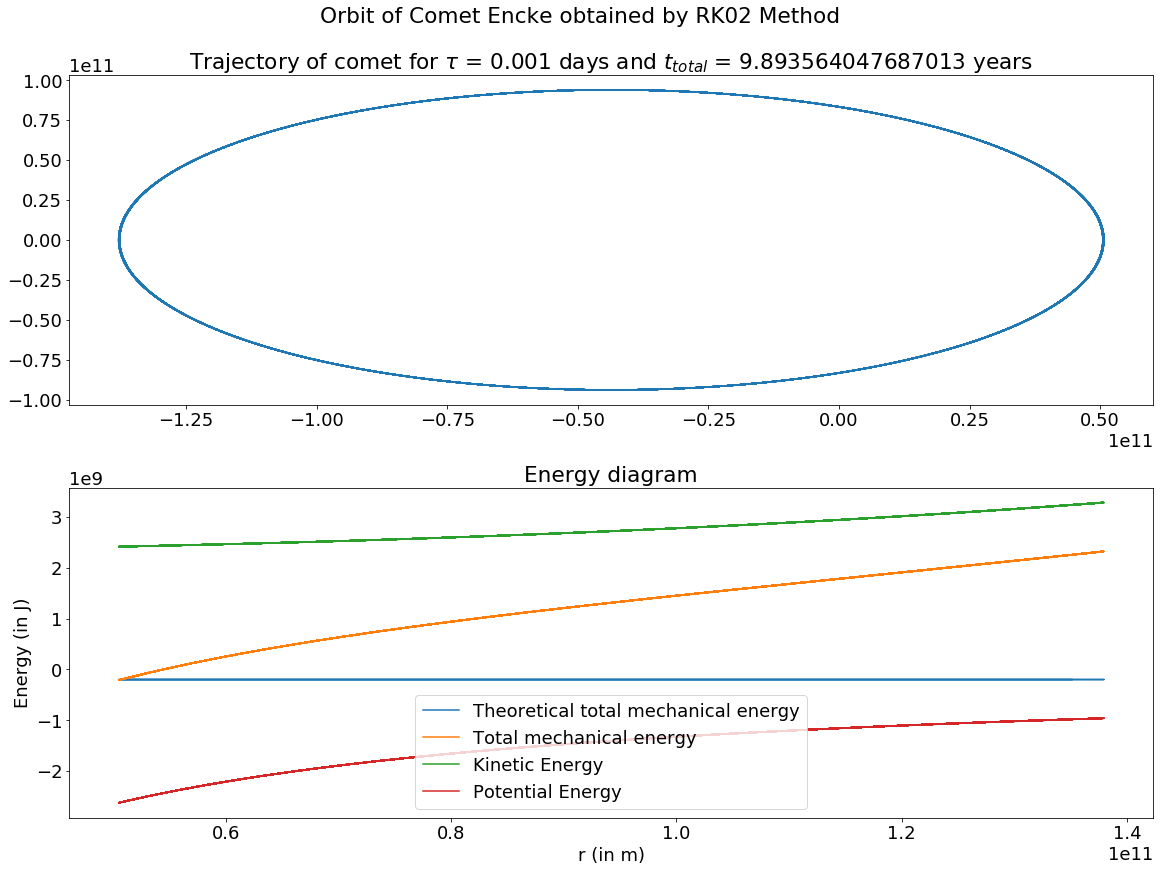

In [14]:
rk02_plot(.339,0.847,3*Tperiod(.339,0.847),0.001,'Encke')

## Fourth Order Runge-Kutta Method

In [29]:
def rk04(q,e,n,dts):
    x0,y0,vx0,vy0=AUtom(q),0,0,v_p(q,e)
    dt=1*24*60*60*3*dts
    tmax=1*24*60*60*365*n
    x=[]
    y=[]
    vx=[]
    vy=[]
    t=dt
    while t<tmax:   
        kvx=[0]*4
        kvy=[0]*4
        kx=[vx0]*4
        ky=[vy0]*4
        x.append(x0)
        y.append(y0)
        vx.append(vx0)
        vy.append(vy0)
        kvx[0]=accx(x0,y0)
        kvy[0]=accy(x0,y0)
        kvx[1]=accx(x0+(dt/2)*kx[0],y0+(dt/2)*ky[0])
        kvy[1]=accy(x0+(dt/2)*kx[0],y0+(dt/2)*ky[0])
        kx[1]+=(kvx[0])*dt/2
        ky[1]+=(kvy[0])*dt/2
        kvx[2]=accx(x0+(dt/2)*kx[1],y0+(dt/2)*ky[1])
        kvy[2]=accy(x0+(dt/2)*kx[1],y0+(dt/2)*ky[1])
        kx[2]+=(kvx[1])*dt/2
        ky[2]+=(kvy[1])*dt/2
        kvx[3]=accx(x0+dt*kx[2],y0+dt*ky[2])
        kvy[3]=accy(x0+dt*kx[2],y0+dt*ky[2])
        kx[3]+=(kvx[2])*dt/2
        ky[3]+=(kvy[2])*dt/2
        vx0+=(dt/6)*(kvx[0]+2*kvx[1]+2*kvx[2]+kvx[3])
        vy0+=(dt/6)*(kvy[0]+2*kvy[1]+2*kvy[2]+kvy[3])
        x0+=(dt/6)*(kx[0]+2*kx[1]+2*kx[2]+kx[3])
        y0+=(dt/6)*(ky[0]+2*ky[1]+2*ky[2]+ky[3])
        t+=dt
    r=[math.sqrt(i**2+j**2) for i,j in zip(x,y)]
    v=[math.sqrt(i**2+j**2) for i,j in zip(vx,vy)]
    th_totE=[totE(q,e)]*len(x)
    totalE=[((i**2)/2)-(G*M/j) for i,j in zip(v,r)]
    kinE=[((i**2)/2)for i in v]
    potE=[-(G*M/j) for j in r]
    return {'x':x,'y':y,'vx':vx,'vy':vy,'r':r,'v':v,'totalE':totalE,'kinE':kinE,'potE':potE,'th_totE':th_totE}

def rk04_plot(q,e,n,dts,name):
    t=rk04(q,e,n,dts)
    fig, axs = plt.subplots(2,constrained_layout=True)
    fig.suptitle('Orbit of Comet '+name+' obtained by RK04 Method')
    fig.set_size_inches(16, 12, forward=True)
    axs[0].plot(t['x'],t['y'])
    axs[0].set_title('Trajectory of comet for $\\tau$ = '+str(dts)+' days and $t_{total}$ = '+str(n)+' years')
    axs[1].plot(t['r'],t['th_totE'],label='Theoretical total mechanical energy')
    axs[1].plot(t['r'],t['totalE'],label='Total mechanical energy')
    axs[1].plot(t['r'],t['kinE'],label='Kinetic Energy')
    axs[1].plot(t['r'],t['potE'],label='Potential Energy')
    axs[1].set_xlabel('r (in m)')
    axs[1].set_ylabel('Energy (in J)')
    axs[1].set_title('Energy diagram')
    axs[1].legend(loc='best')

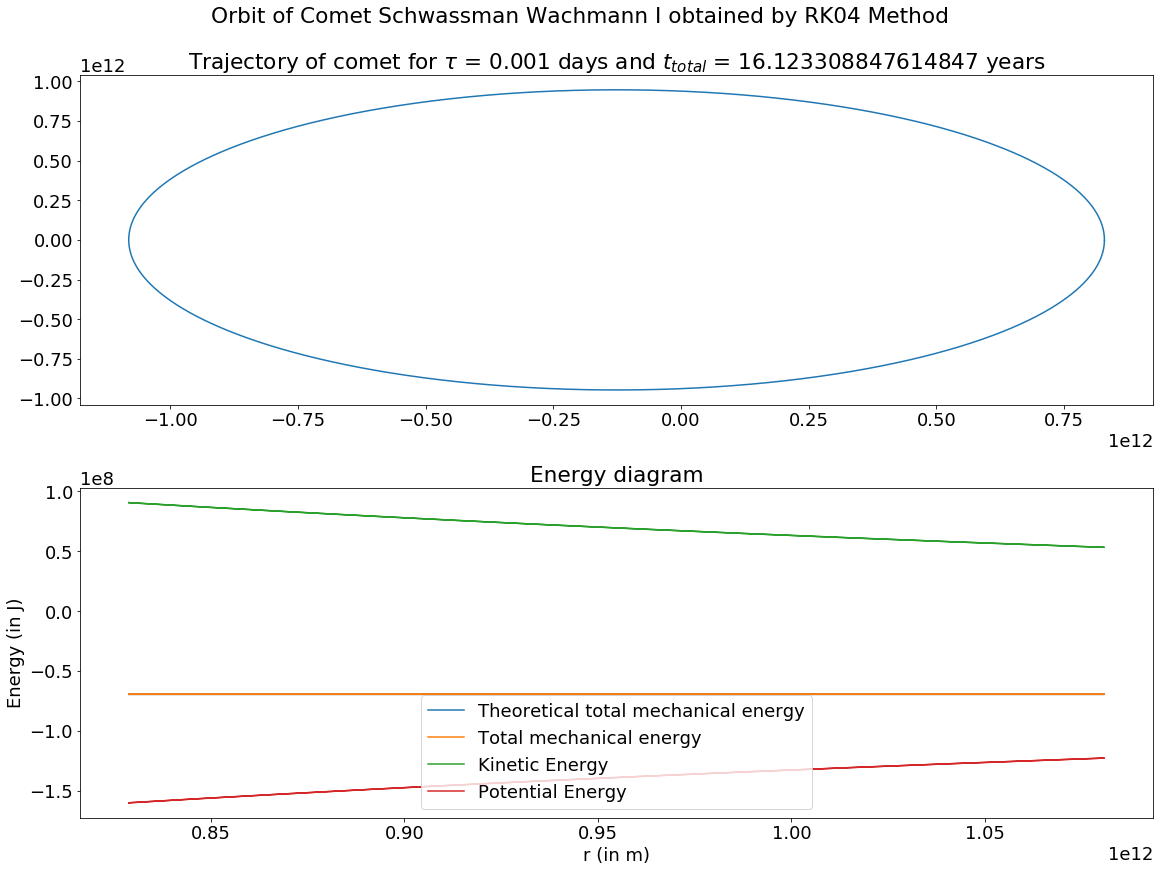

In [30]:
rk04_plot(5.540,0.132,Tperiod(5.540,0.132),0.001,'Schwassman Wachmann I')

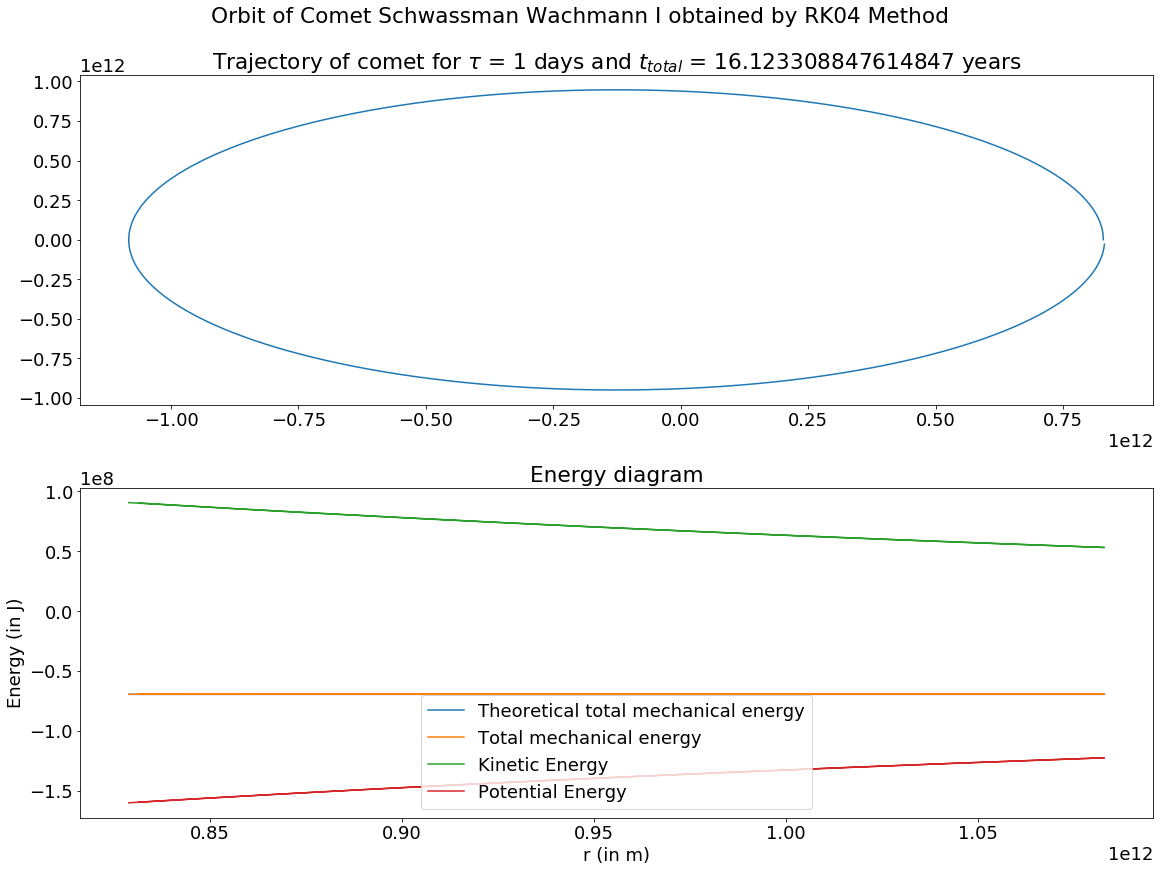

In [31]:
rk04_plot(5.540,0.132,Tperiod(5.540,0.132),1,'Schwassman Wachmann I')

## Combined Plots

In [32]:
def get_data(q,e,n,dts):
    eu=euler(q,e,n,dts)
    euc=euler_cromer(q,e,n,dts)
    mp=mid_point(q,e,n,dts)
    lf=leap_frog(q,e,n,dts)
    v=verlet(q,e,n,dts)
    r2=rk02(q,e,n,dts)
    r4=rk04(q,e,n,dts)
    return {'eu':eu,'euc':euc,'mp':mp,'lf':lf,'v':v,'r2':r2,'r4':r4}

In [33]:
data1=get_data(5.540,0.132,Tperiod(5.540,0.132),0.001);

In [34]:
data2=get_data(5.540,0.132,Tperiod(5.540,0.132),0.1);

### Orbits

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


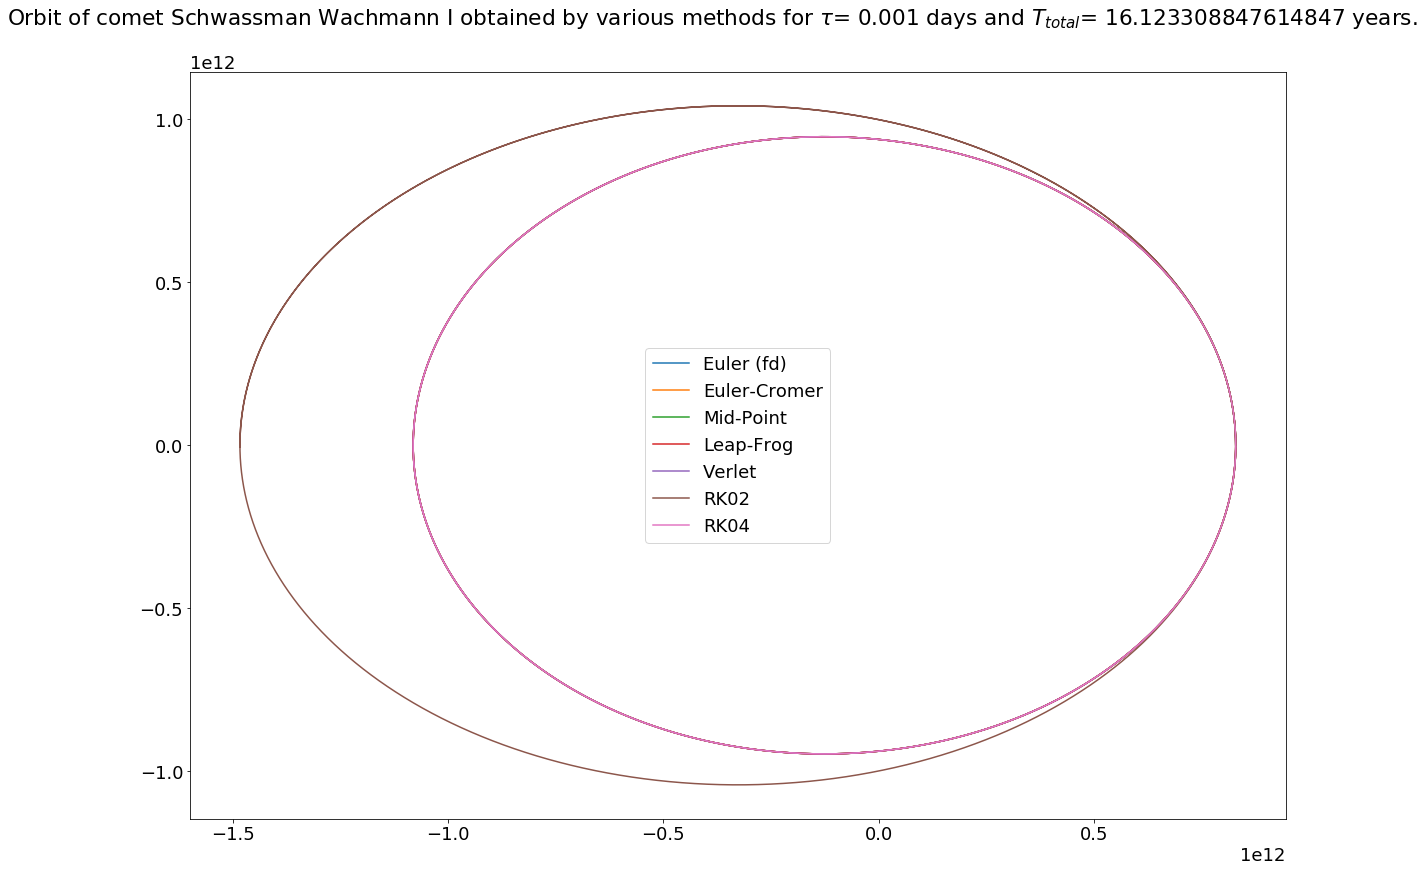

In [35]:
fig, axs = plt.subplots(1,1,constrained_layout=True)
fig.suptitle('Orbit of comet Schwassman Wachmann I obtained by various methods for $\\tau$= 0.001 days and $T_{total}$= '+str(Tperiod(5.540,0.132))+' years.')
fig.set_size_inches(16, 12, forward=True)
axs.plot(data1['eu']['x'],data1['eu']['y'],label='Euler (fd)')
axs.plot(data1['euc']['x'],data1['euc']['y'],label='Euler-Cromer')
axs.plot(data1['mp']['x'],data1['mp']['y'],label='Mid-Point')
axs.plot(data1['lf']['x'],data1['lf']['y'],label='Leap-Frog')
axs.plot(data1['v']['x'],data1['v']['y'],label='Verlet')
axs.plot(data1['r2']['x'],data1['r2']['y'],label='RK02')
axs.plot(data1['r4']['x'],data1['r4']['y'],label='RK04')
axs.legend()

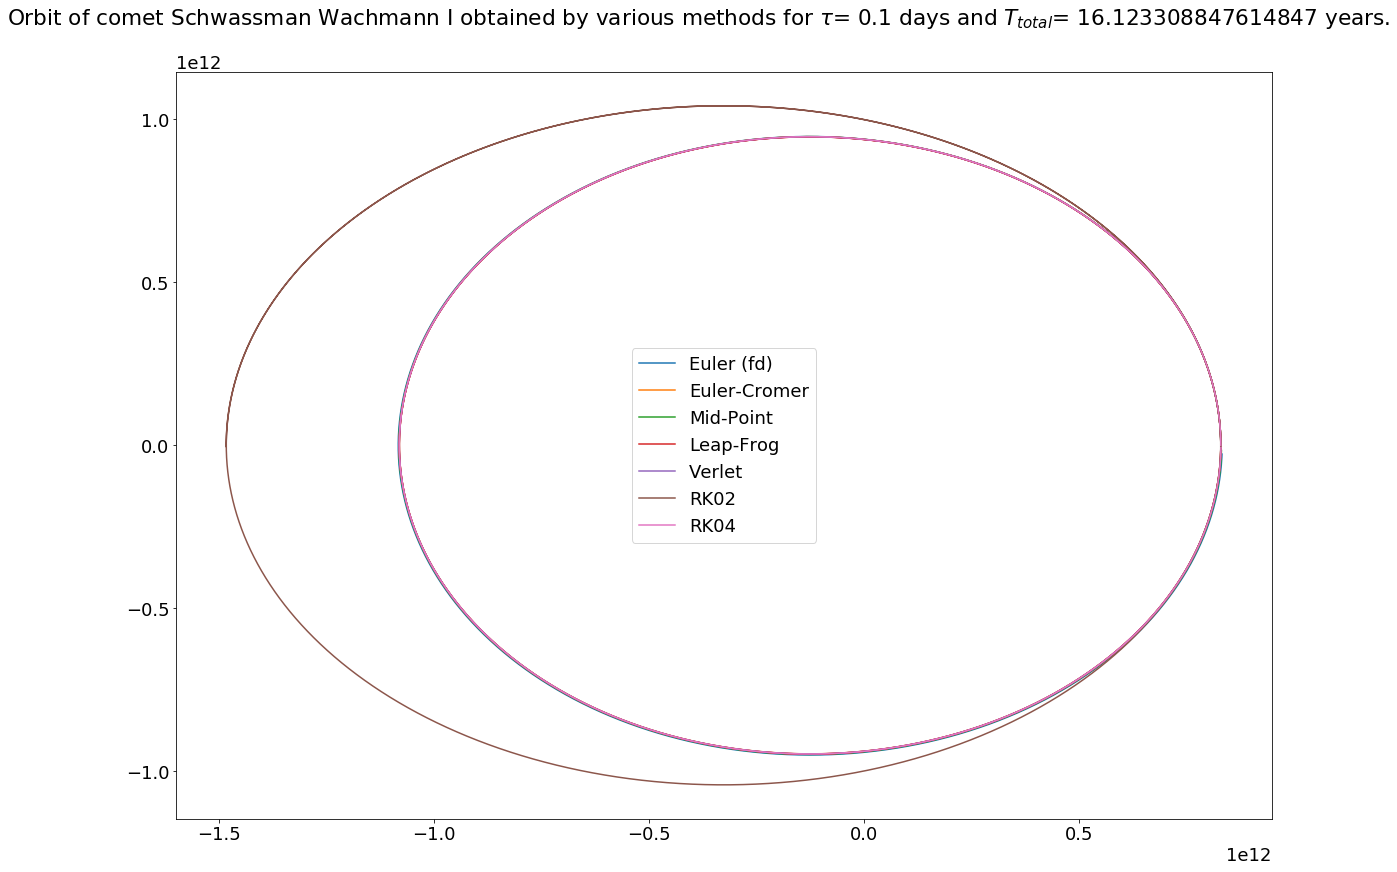

In [37]:
fig, axs = plt.subplots(1,1,constrained_layout=True)
fig.suptitle('Orbit of comet Schwassman Wachmann I obtained by various methods for $\\tau$= 0.1 days and $T_{total}$= '+str(Tperiod(5.540,0.132))+' years.')
fig.set_size_inches(16, 12, forward=True)
axs.plot(data2['eu']['x'],data2['eu']['y'],label='Euler (fd)')
axs.plot(data2['euc']['x'],data2['euc']['y'],label='Euler-Cromer')
axs.plot(data2['mp']['x'],data2['mp']['y'],label='Mid-Point')
axs.plot(data2['lf']['x'],data2['lf']['y'],label='Leap-Frog')
axs.plot(data2['v']['x'],data2['v']['y'],label='Verlet')
axs.plot(data2['r2']['x'],data2['r2']['y'],label='RK02')
axs.plot(data2['r4']['x'],data2['r4']['y'],label='RK04')
axs.legend()

### Energy

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


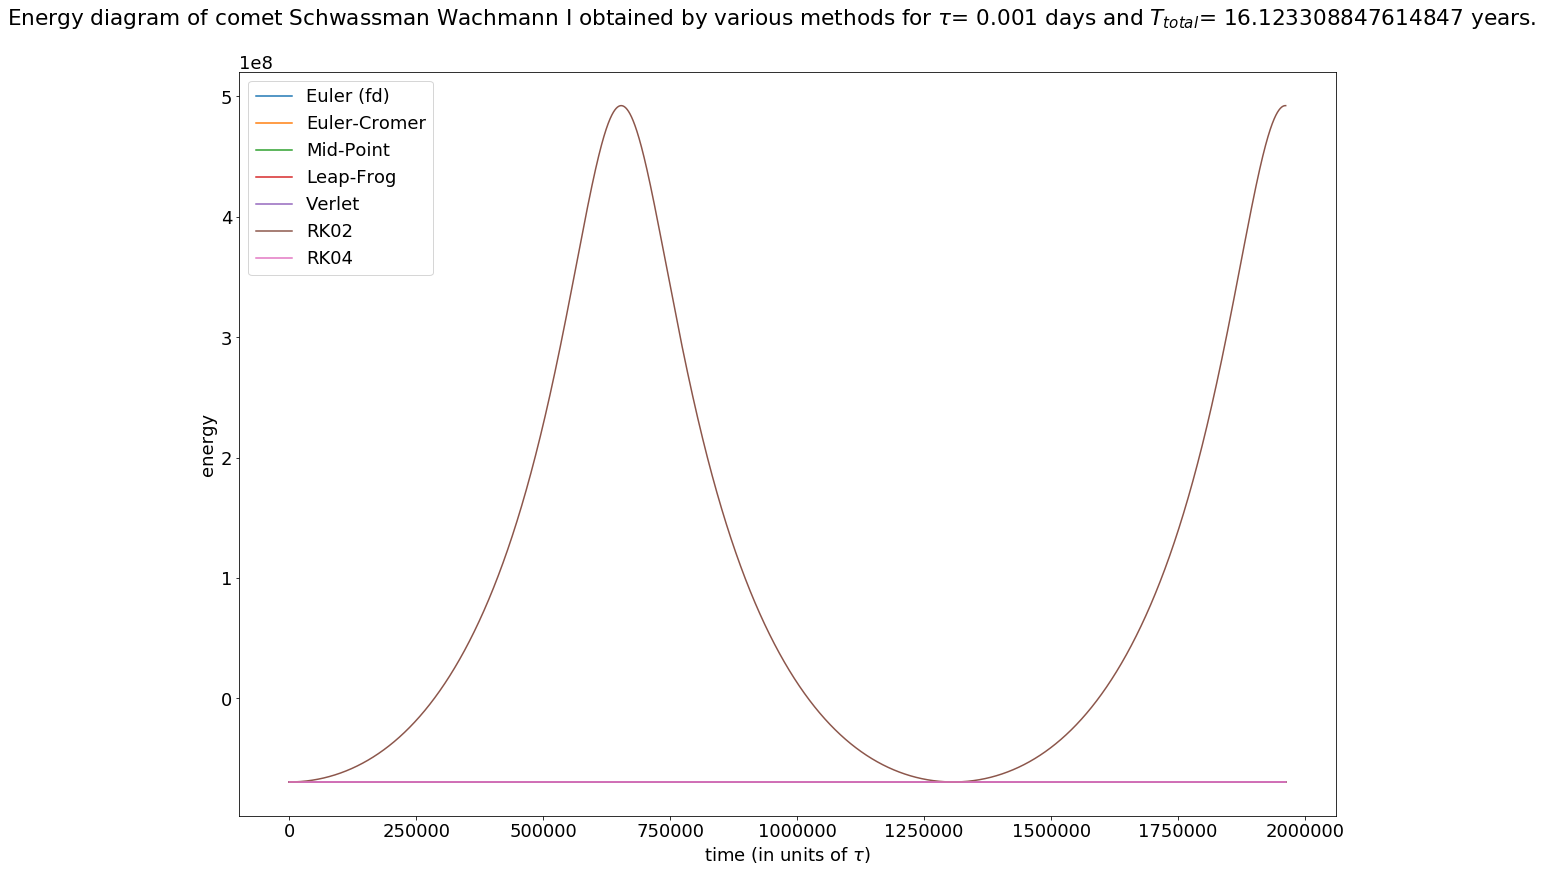

In [36]:
fig, axs = plt.subplots(1,constrained_layout=True)
fig.suptitle('Energy diagram of comet Schwassman Wachmann I obtained by various methods for $\\tau$= 0.001 days and $T_{total}$= '+str(Tperiod(5.540,0.132))+' years.')
fig.set_size_inches(16, 12, forward=True)
axs.plot(data1['eu']['totalE'],label='Euler (fd)')
axs.plot(data1['euc']['totalE'],label='Euler-Cromer')
axs.plot(data1['mp']['totalE'],label='Mid-Point')
axs.plot(data1['lf']['totalE'],label='Leap-Frog')
axs.plot(data1['v']['totalE'],label='Verlet')
axs.plot(data1['r2']['totalE'],label='RK02')
axs.plot(data1['r4']['totalE'],label='RK04')
axs.set_xlabel('time (in units of $\\tau$)')
axs.set_ylabel('energy')
axs.legend()

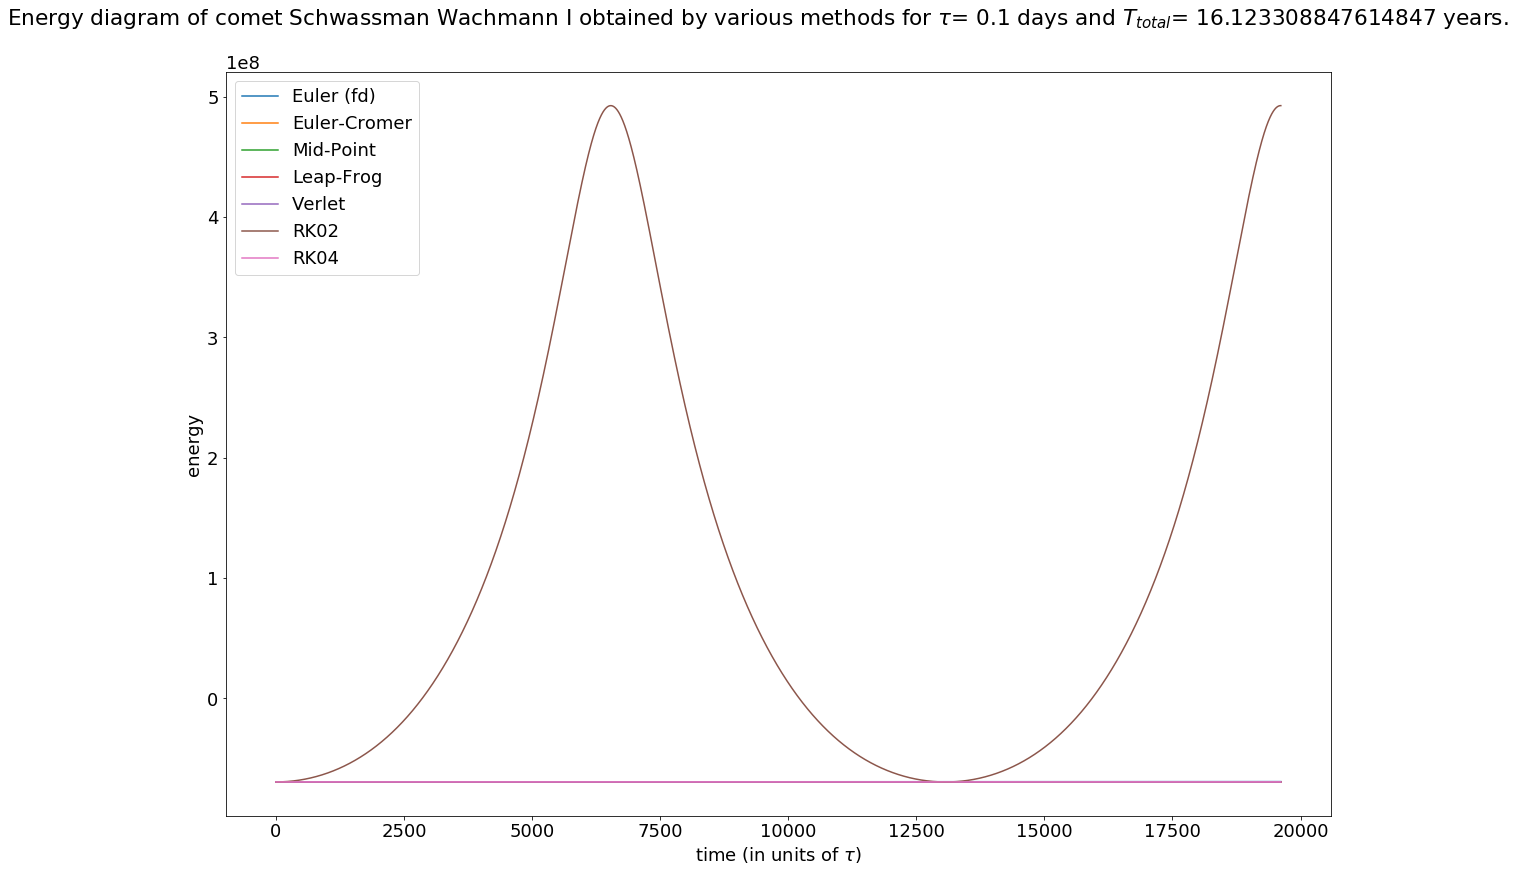

In [39]:
fig, axs = plt.subplots(1,constrained_layout=True)
fig.suptitle('Energy diagram of comet Schwassman Wachmann I obtained by various methods for $\\tau$= 0.1 days and $T_{total}$= '+str(Tperiod(5.540,0.132))+' years.')
fig.set_size_inches(16, 12, forward=True)
axs.plot(data2['eu']['totalE'],label='Euler (fd)')
axs.plot(data2['euc']['totalE'],label='Euler-Cromer')
axs.plot(data2['mp']['totalE'],label='Mid-Point')
axs.plot(data2['lf']['totalE'],label='Leap-Frog')
axs.plot(data2['v']['totalE'],label='Verlet')
axs.plot(data2['r2']['totalE'],label='RK02')
axs.plot(data2['r4']['totalE'],label='RK04')
axs.set_xlabel('time (in units of $\\tau$)')
axs.set_ylabel('energy')
axs.legend()

In [46]:
data3=get_data(5.540,0.132,Tperiod(5.540,0.132)*10,30);

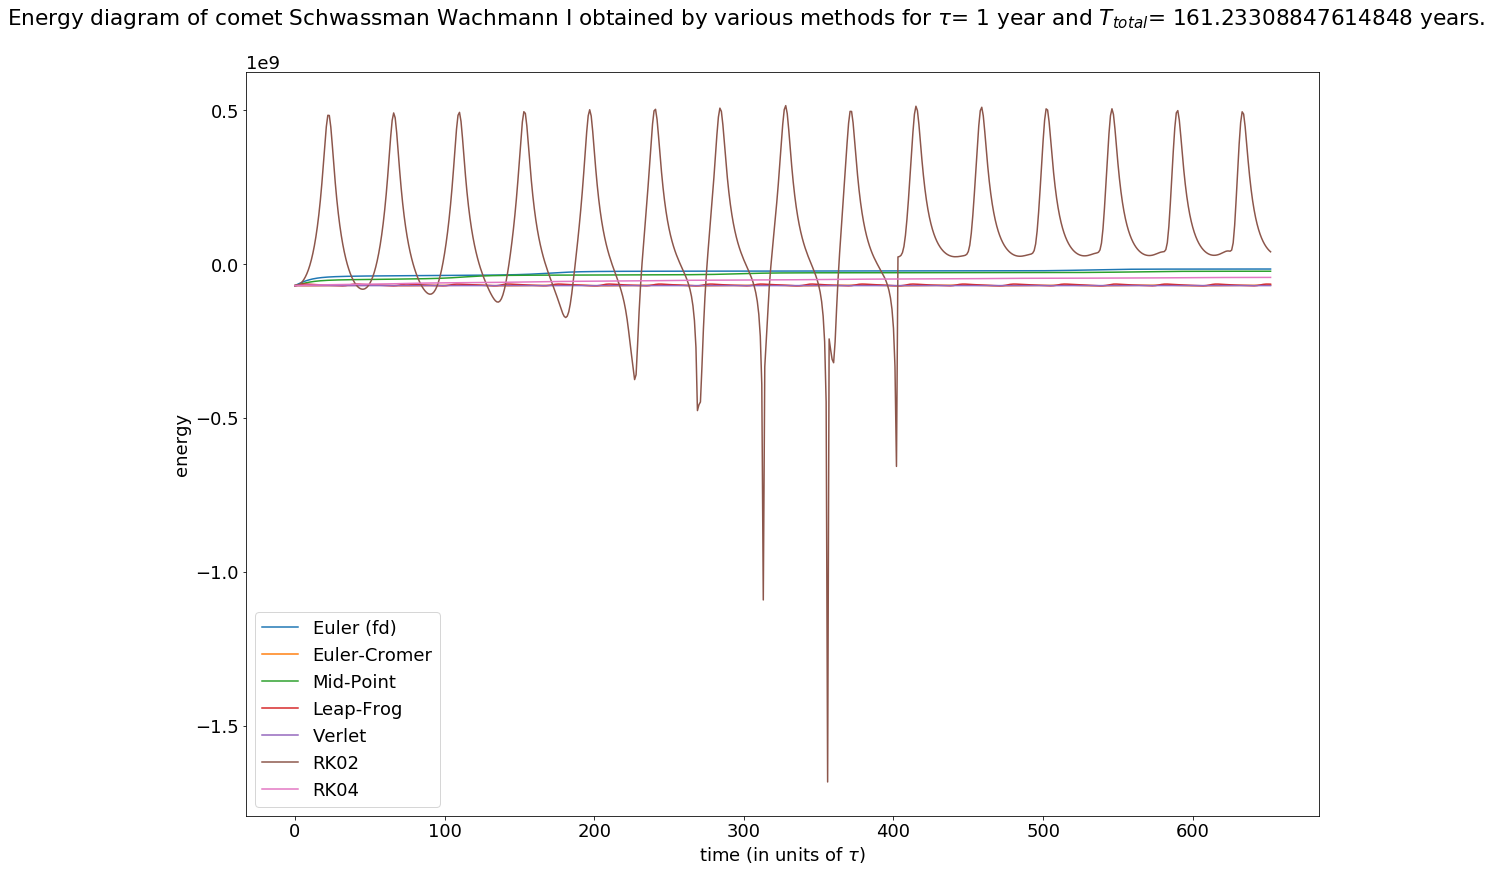

In [47]:
fig, axs = plt.subplots(1,constrained_layout=True)
fig.suptitle('Energy diagram of comet Schwassman Wachmann I obtained by various methods for $\\tau$= 1 year and $T_{total}$= '+str(Tperiod(5.540,0.132)*10)+' years.')
fig.set_size_inches(16, 12, forward=True)
axs.plot(data3['eu']['totalE'],label='Euler (fd)')
axs.plot(data3['euc']['totalE'],label='Euler-Cromer')
axs.plot(data3['mp']['totalE'],label='Mid-Point')
axs.plot(data3['lf']['totalE'],label='Leap-Frog')
axs.plot(data3['v']['totalE'],label='Verlet')
axs.plot(data3['r2']['totalE'],label='RK02')
axs.plot(data3['r4']['totalE'],label='RK04')
axs.set_xlabel('time (in units of $\\tau$)')
axs.set_ylabel('energy')
axs.legend()